## Looking into basic statistics, from Kaggle data, focusing on US asylum seekers.

In [323]:
ls data/

affirmative_asylum.csv
asylum_statistics.csv
defensive_asylum.csv
refugee_statistics.csv
refugee_status.csv
unhcr_popstats_export_time_series_all_data.csv


In [324]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [325]:
path = './data'
aff_asylum = pd.read_csv(os.path.join(path, "affirmative_asylum.csv"))
asylum_statistics = pd.read_csv(os.path.join(path, "asylum_statistics.csv"))
def_asylum = pd.read_csv(os.path.join(path, "defensive_asylum.csv"))
refugee_status = pd.read_csv(os.path.join(path, "refugee_status.csv"))

## These are the total statistics of all refugees and their segments

In [326]:
refugee_statistics

,Sex/Age/Marital Status,Applicants,Spouses,Children,All Refugees
0,Female,"10,082","8,688","14,565","33,335"
1,Male,"18,317","2,104","16,163","36,584"
2,Sex Unknown,1,-,-,1
3,Under 16 Years,679,-,"24,309","24,988"
4,16 to 20 Years,"1,354",176,"5,376","6,906"
5,21 Years and Over,"26,367","10,616","1,043","38,026"
6,Under 1 Year,4,-,235,239
7,1 to 4 Years,118,-,"7,571","7,689"
8,5 to 9 Years,132,-,"8,138","8,270"
9,10 to 14 Years,316,-,"7,060","7,376"


In [327]:
refugee_status.head()

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
1,Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
2,Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
3,North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
4,Oceania,-,-,-,-,-,-,-,-,-,-


## affirmative asylum seekers

In [328]:
aff_asylum.head(10)

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"2,112","2,567","2,686","2,852","2,666","3,055","5,054","4,860","4,303","3,724"
1,Asia,"3,340","4,446","4,846","5,556","5,421","6,467","8,031","7,528","7,429","6,652"
2,Europe,553,672,755,812,729,961,"1,213",778,571,729
3,North America,"3,600","2,243","1,753","1,484","1,421","1,543","1,649","1,143","1,594","5,811"
4,Oceania,18,27,23,18,8,19,20,10,21,4
5,South America,"3,384","2,440","1,974","1,129",929,"1,327","1,423",846,630,911
6,Unknown,41,53,92,129,53,47,38,40,35,47
7,Afghanistan,9,43,45,80,113,119,157,96,105,156
8,Albania,44,33,32,33,27,18,21,14,31,22
9,Algeria,5,D,8,5,9,8,12,3,8,6


## defensive asylum seekers

In [329]:
def_asylum.head(10)

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"2,830","2,522","2,046","2,326","1,912","2,340","2,118","1,976","1,697","1,380"
1,Asia,"6,668","6,707","5,509","5,423","4,872","5,855","6,745","6,137","5,445","4,803"
2,Europe,"1,441","1,318","1,177",928,746,864,823,872,654,538
3,North America,"1,007","1,071","1,083",855,489,535,632,681,745,"1,299"
4,Oceania,45,25,36,32,16,23,20,9,7,8
5,South America,"1,226","1,132",975,646,392,406,269,216,203,170
6,Unknown,87,84,66,90,92,115,111,55,40,48
7,Afghanistan,25,22,28,7,5,18,34,16,18,13
8,Albania,497,421,324,213,103,101,72,71,66,75
9,Algeria,13,6,5,6,-,4,6,D,D,D


In [348]:
import re
df_da = def_asylum
df_da = df_da.set_index('Continent/Country of Nationality')
df_da = df_da.transpose()
df_da = df_da.apply(lambda x: [re.sub('[A-Z-,]*','',x[i]) for i in range(len(x))])
# df_da = df_da.apply(lambda x: int(x))

In [356]:
df_da.replace(to_replace = '',value = np.nan,regex = True,inplace =True)
df_da = df_da.apply(lambda x: x.fillna(x.median()),axis=0)
df_da = df_da.astype('float')
## this gets rid of blank values and fills them with NaN and then fills in with the median/mean values...

In [357]:
df_da

Continent/Country of Nationality,Africa,Asia,Europe,North America,Oceania,South America,Unknown,Afghanistan,Albania,Algeria,...,Uganda,Ukraine,Uzbekistan,Venezuela,Vietnam,Yemen,Zimbabwe,Other,Unknown,Total
2006,2830.0,6668.0,1441.0,1007.0,45.0,1226.0,87.0,25.0,497.0,13.0,...,36.0,45.0,95.0,279.0,10.0,10.0,56.0,114.0,87.0,13304.0
2007,2522.0,6707.0,1318.0,1071.0,25.0,1132.0,84.0,22.0,421.0,6.0,...,50.0,40.0,74.0,317.0,10.0,8.0,97.0,103.0,84.0,12859.0
2008,2046.0,5509.0,1177.0,1083.0,36.0,975.0,66.0,28.0,324.0,5.0,...,33.0,59.0,67.0,306.0,7.0,8.0,68.0,114.0,66.0,10892.0
2009,2326.0,5423.0,928.0,855.0,32.0,646.0,90.0,7.0,213.0,6.0,...,28.0,26.0,65.0,192.0,10.0,7.0,69.0,93.0,90.0,10300.0
2010,1912.0,4872.0,746.0,489.0,16.0,392.0,92.0,5.0,103.0,6.0,...,19.0,59.0,48.0,143.0,8.0,7.0,48.0,90.0,92.0,8519.0
2011,2340.0,5855.0,864.0,535.0,23.0,406.0,115.0,18.0,101.0,4.0,...,21.0,45.0,62.0,159.0,12.0,28.0,39.0,91.0,115.0,10138.0
2012,2118.0,6745.0,823.0,632.0,20.0,269.0,111.0,34.0,72.0,6.0,...,24.0,47.0,37.0,113.0,10.0,16.0,34.0,97.0,111.0,10718.0
2013,1976.0,6137.0,872.0,681.0,9.0,216.0,55.0,16.0,71.0,6.0,...,30.0,43.0,55.0,79.0,4.0,9.0,24.0,99.0,55.0,9946.0
2014,1697.0,5445.0,654.0,745.0,7.0,203.0,40.0,18.0,66.0,6.0,...,21.0,47.0,40.0,92.0,10.0,16.0,8.0,69.0,40.0,8791.0
2015,1380.0,4803.0,538.0,1299.0,8.0,170.0,48.0,13.0,75.0,6.0,...,10.0,39.0,23.0,34.0,10.0,8.0,48.0,55.0,48.0,8246.0


In [358]:
[df_da.columns[i] for i in range(idx)]

['Africa', 'Asia', 'Europe']

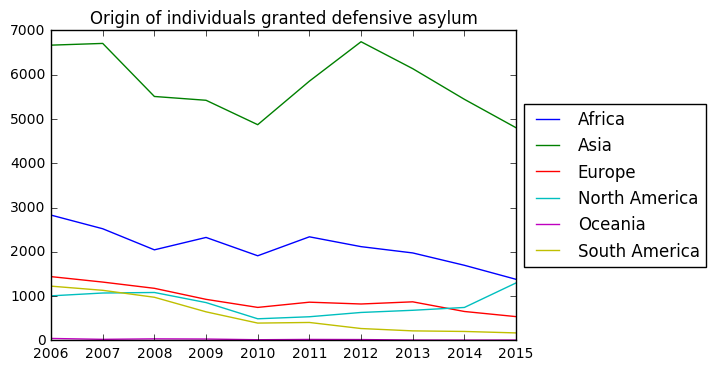

In [363]:
times = list(df_da.index)
# df_da.index = pd.to_datetime(times)
idx = 6
df_da.iloc[:,0:idx].plot()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Origin of individuals granted defensive asylum')
plt.show()
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
## For affirmative asylum 

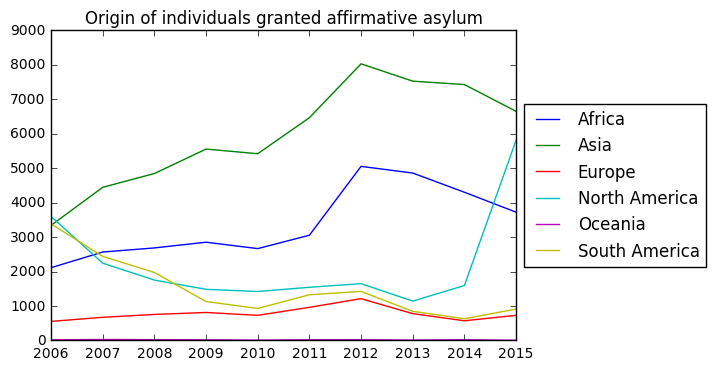

In [364]:
df_aa = df_a
idx_2 = 6
df_aa = df_aa[:idx_2]
df_aa = df_aa.set_index('Continent/Country of Nationality')
df_aa = df_aa.transpose()
df_aa = df_aa.astype('float')
df_aa.plot(title='Origin of individuals granted affirmative asylum')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))